In [417]:
#import numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [418]:
#import loan csv
loans = pd.read_csv("loan.csv",low_memory=False)

In [420]:
#drop all the columns with all na values
loans_non_na=loans.dropna(axis=1,how='all')
#Print shape prior to dropping and post dropping
print(loans.shape)
print(loans_non_na.shape)


(39717, 111)
(39717, 57)


In [421]:
#drop columns where all the values in the column are either 0,null or ''
zero_columns = loans_non_na.columns[(loans_non_na.eq(0) | loans_non_na.isnull() | (loans_non_na=='')).all()]
loans_clean = loans_non_na.drop(zero_columns,axis=1)
#Print shape 
print(loans_clean.shape)


(39717, 52)


In [422]:
# define new interest column with float values that will help in binning and computation
loans_clean['int_rate_float'] = loans_clean['int_rate'].str.rstrip('%').astype(float)


In [423]:
# map employment length to numeric value
tenure_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
loans_clean['emp_tenure_num'] = loans_clean['emp_length'].map(tenure_mapping)

In [424]:
#splice charge off loan data set from clean loans data set
charged_off_loans = loans_clean[loans_clean['loan_status'] == 'Charged Off']

In [425]:
#define function to plot % of charged off loan data for non segmented variables post segmentation
def plot_charged_off_loans(charged_off_loans, all_loans, loan_bins, analyse_col, x_label, y_label, title):
    charged_off_loan_groups = charged_off_loans.groupby(pd.cut(charged_off_loans[analyse_col], loan_bins)) #bin & group charged off data
    loan_groups = all_loans.groupby(pd.cut(all_loans[analyse_col], loan_bins))#bin & group clean data
    charged_off_by_bin = charged_off_loan_groups.size() #count charged off record for all groups
    loan_groups_by_bin = loan_groups.size() #count clean records for all groups
    percentage_charged_off = (charged_off_by_bin / loan_groups_by_bin) * 100 # calculate %
    width = 0.8 * (loan_bins[1] - loan_bins[0])    #reduce width of bar width
    plt.bar(loan_bins[:-1], percentage_charged_off.values, width=width, align='edge') #plot the graph
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

    


In [426]:
#define function to plot % of charged off loan data for segmented variables
def plot_charged_off_index_value(charged_off_loans, all_loans, analyse_col, x_label, y_label, title):
    total_loans_byaxis=all_loans.groupby(analyse_col).size() #find count of all records against that axis
    charged_off_loans_byaxis=charged_off_loans.groupby(analyse_col).size() #find count of all charged off records against that axis
    percentage_by_axis=(charged_off_loans_byaxis / total_loans_byaxis) * 100 #find % using division
    plt.bar(percentage_by_axis.index, percentage_by_axis.values) #plot the graph
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

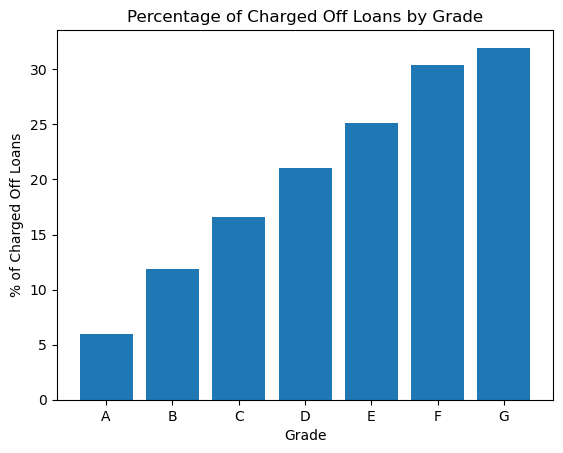

In [427]:
# plot of percentage of charged off loan against each grade
analyse_col = 'grade'  # Column name for grade
x_label = 'Grade'  # X-axis label
y_label = '% of Charged Off Loans'  # Y-axis label
title = 'Percentage of Charged Off Loans by Grade'  # Plot title
plot_charged_off_index_value(charged_off_loans, loans_clean, analyse_col, x_label, y_label, title)

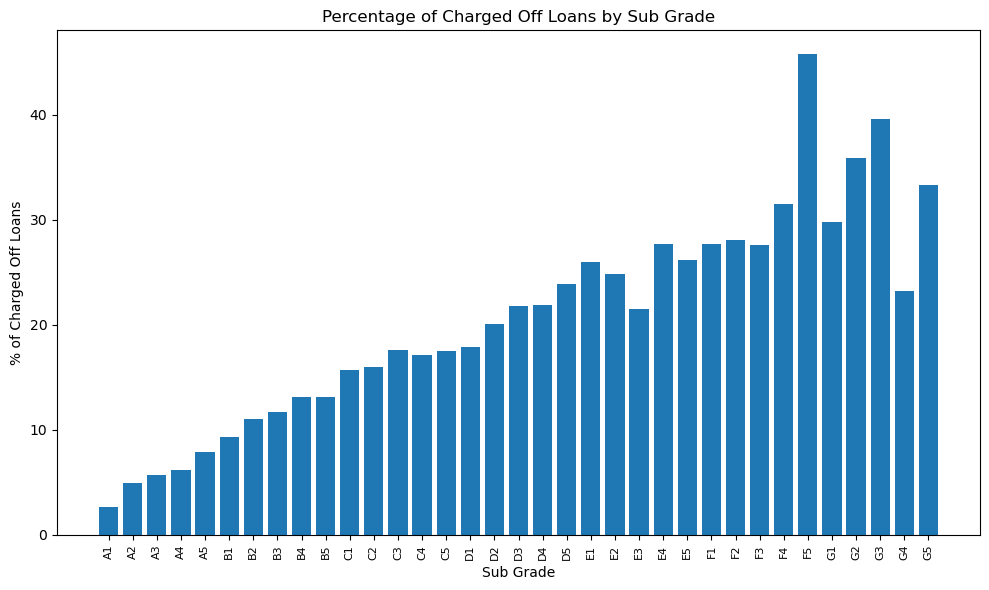

In [428]:
# plot of percentage of charged off loan against each sub grade
loans_by_sub_grade = charged_off_loans.groupby('sub_grade').size()
total_charged_off_loans_sub_grade = loans_clean.groupby('sub_grade').size()
percentage_by_sub_grade = (loans_by_sub_grade / total_charged_off_loans_sub_grade) * 100
x_ticks = range(len(percentage_by_sub_grade.index))
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.bar(x_ticks, percentage_by_sub_grade.values)
ax.set_xlabel('Sub Grade')
ax.set_ylabel('% of Charged Off Loans')
ax.set_title('Percentage of Charged Off Loans by Sub Grade')
ax.set_xticks(x_ticks)
ax.set_xticklabels(percentage_by_sub_grade.index, rotation='vertical', fontsize=8)  # Set smaller font size and rotate the labels
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

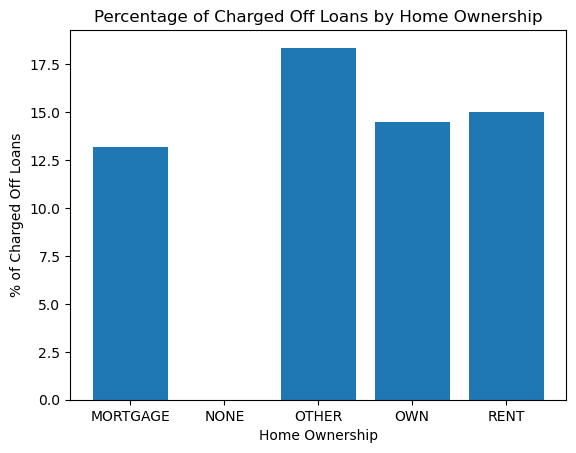

In [429]:
# plot of percentage of charged off loan against Home Ownership
analyse_col = 'home_ownership'  # Column name for home_ownership
x_label = 'Home Ownership'  # X-axis label
y_label = '% of Charged Off Loans'  # Y-axis label
title = 'Percentage of Charged Off Loans by Home Ownership'  # Plot title
plot_charged_off_index_value(charged_off_loans, loans_clean, analyse_col, x_label, y_label, title)

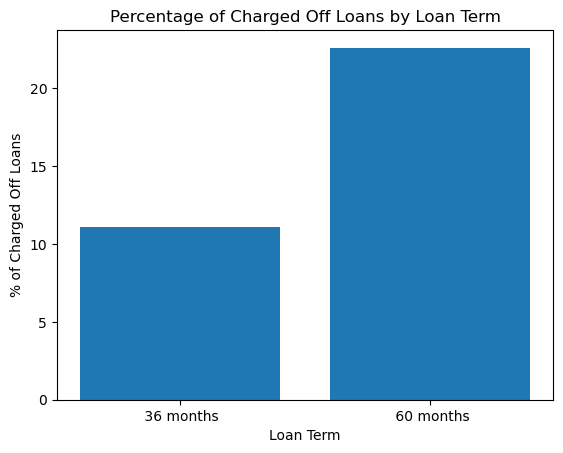

In [430]:
# plot of percentage of charged off loan against Loan Term
analyse_col = 'term'  # Column name for Loan Term
x_label = 'Loan Term'  # X-axis label
y_label = '% of Charged Off Loans'  # Y-axis label
title = 'Percentage of Charged Off Loans by Loan Term'  # Plot title
plot_charged_off_index_value(charged_off_loans, loans_clean, analyse_col, x_label, y_label, title)


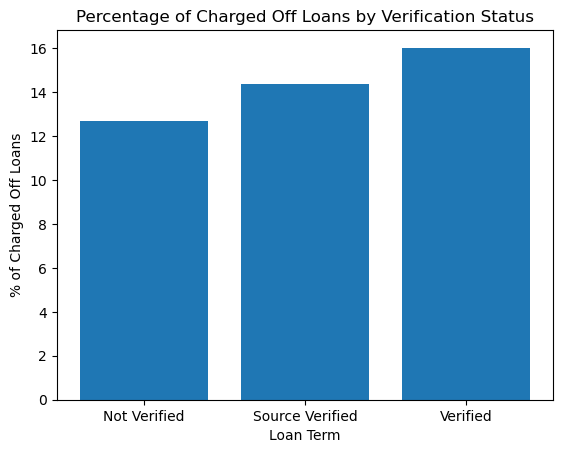

In [431]:
# plot of percentage of charged off loan against Verification Status
analyse_col = 'verification_status'  # Column name for Verification Status
x_label = 'Loan Term'  # X-axis label
y_label = '% of Charged Off Loans'  # Y-axis label
title = 'Percentage of Charged Off Loans by Verification Status'  # Plot title
plot_charged_off_index_value(charged_off_loans, loans_clean, analyse_col, x_label, y_label, title)


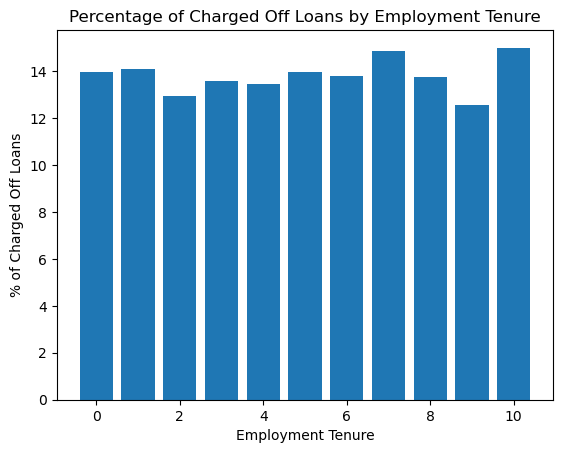

In [432]:
# plot of percentage of charged off loan against Years of Employment 
analyse_col = 'emp_tenure_num'  # Column name for Years of Employment
x_label = 'Employment Tenure'  # X-axis label
y_label = '% of Charged Off Loans'  # Y-axis label
title = 'Percentage of Charged Off Loans by Employment Tenure'  # Plot title
plot_charged_off_index_value(charged_off_loans, loans_clean, analyse_col, x_label, y_label, title)


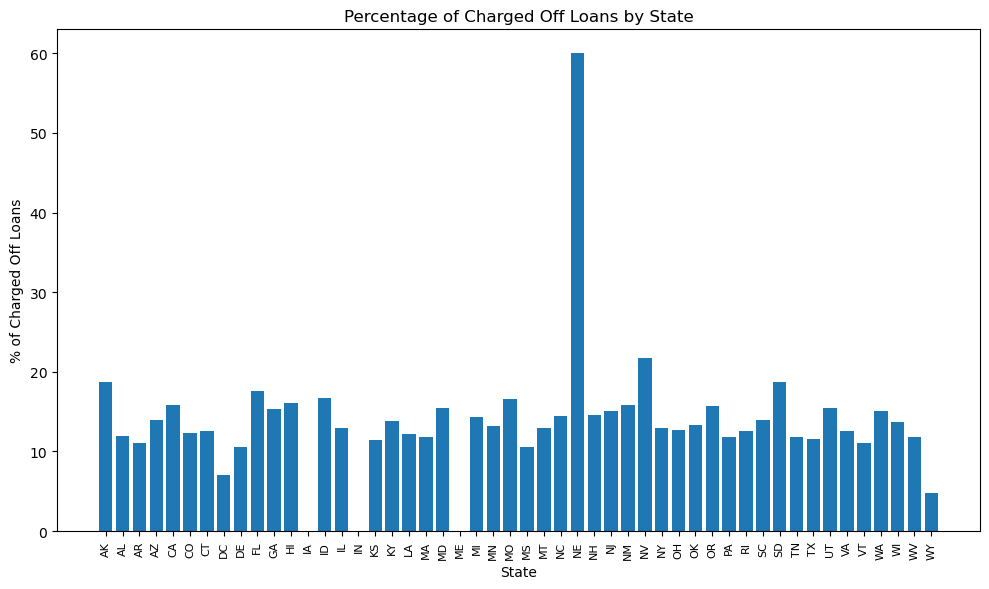

In [433]:
total_charged_off_loans_by_addr_state = charged_off_loans.groupby('addr_state').size()

total_loans_addr_state = loans_clean.groupby('addr_state').size()
percentage_by_addr_state = (total_charged_off_loans_by_addr_state / total_loans_addr_state) * 100

x_ticks = range(len(percentage_by_addr_state.index))
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.bar(x_ticks, percentage_by_addr_state.values)
ax.set_xlabel('State')
ax.set_ylabel('% of Charged Off Loans')
ax.set_title('Percentage of Charged Off Loans by State')
ax.set_xticks(x_ticks)
ax.set_xticklabels(percentage_by_addr_state.index, rotation='vertical', fontsize=8)  # Set smaller font size and rotate the labels
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()


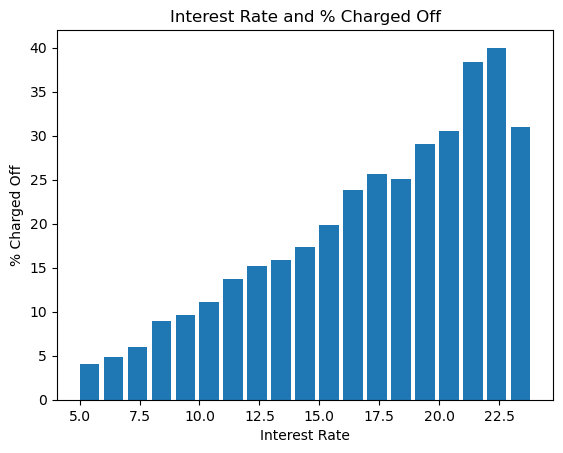

In [434]:
# plot of percentage of charged off loan against Interest Rate 
loan_bins =   np.arange(0, 25, 1)   # Define your loan_bins
analyse_col = 'int_rate_float'  # Column name for interest rate
x_label = 'Interest Rate'  # X-axis label
y_label = '% Charged Off'  # Y-axis label
title = 'Interest Rate and % Charged Off'  # Plot title

plot_charged_off_loans(charged_off_loans, loans_clean, loan_bins, analyse_col, x_label, y_label, title)

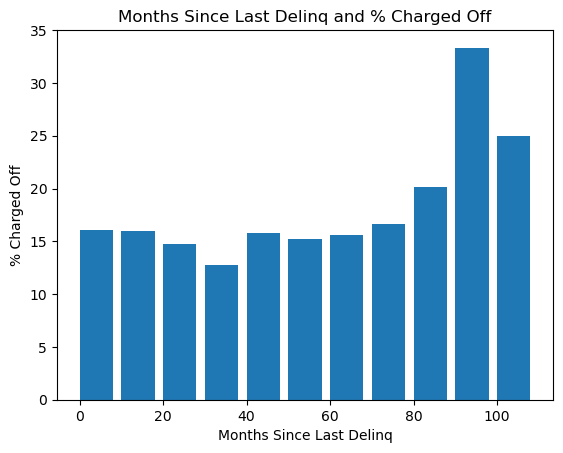

In [435]:
# plot of percentage of charged off loan against Months Since Last Delinq
loan_bins =  np.arange(0, 120, 10)   # Define your loan_bins
analyse_col = 'mths_since_last_delinq'  # Column name for Months Since Last Delinq
x_label = 'Months Since Last Delinq'  # X-axis label
y_label = '% Charged Off'  # Y-axis label
title = 'Months Since Last Delinq and % Charged Off'  # Plot title

plot_charged_off_loans(charged_off_loans, loans_clean, loan_bins, analyse_col, x_label, y_label, title)

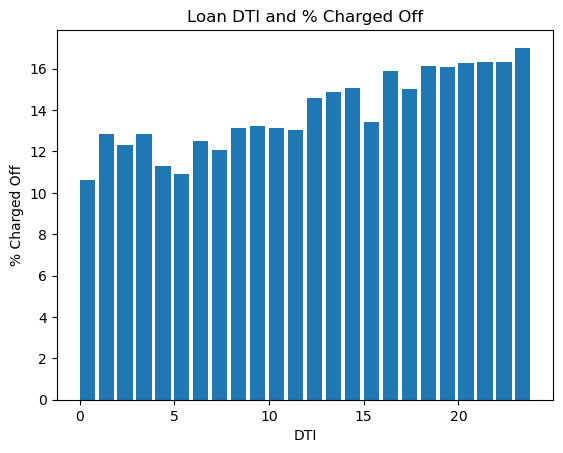

In [436]:
# plot of percentage of charged off loan against DTI
loan_bins =  np.arange(0, 25, 1)   # Define your loan_bins
analyse_col = 'dti'  # Column name for DTI
x_label = 'DTI'  # X-axis label
y_label = '% Charged Off'  # Y-axis label
title = 'Loan DTI and % Charged Off'  # Plot title
plot_charged_off_loans(charged_off_loans, loans_clean, loan_bins, analyse_col, x_label, y_label, title)

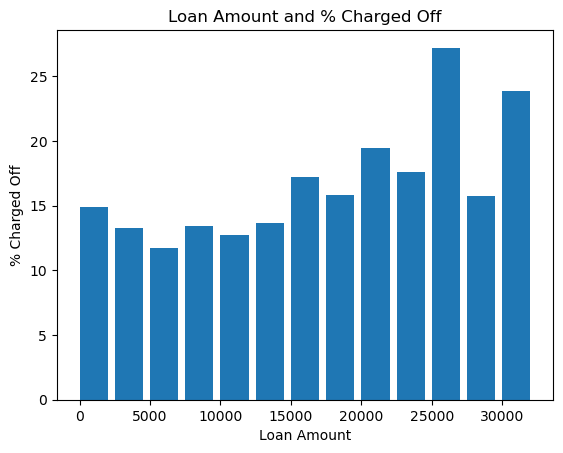

In [437]:
# plot of percentage of charged off loan against Loan Amount
loan_bins =  np.arange(0, 35000, 2500)   # Define your loan_bins
analyse_col = 'loan_amnt'  # Column name for Loan Amount
x_label = 'Loan Amount'  # X-axis label
y_label = '% Charged Off'  # Y-axis label
title = 'Loan Amount and % Charged Off'  # Plot title

plot_charged_off_loans(charged_off_loans, loans_clean, loan_bins, analyse_col, x_label, y_label, title)

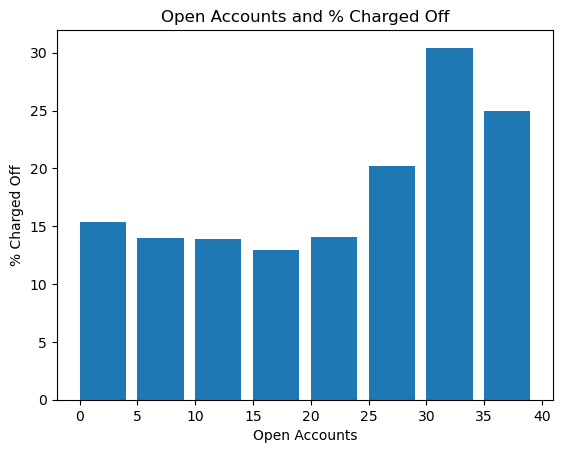

In [438]:
# plot of percentage of charged off loan against Open Accounts
loan_bins =  np.arange(0, 45, 5)   # Define your loan_bins
analyse_col = 'open_acc'  # Column name for Open Accounts
x_label = 'Open Accounts'  # X-axis label
y_label = '% Charged Off'  # Y-axis label
title = 'Open Accounts and % Charged Off'  # Plot title

plot_charged_off_loans(charged_off_loans, loans_clean, loan_bins, analyse_col, x_label, y_label, title)

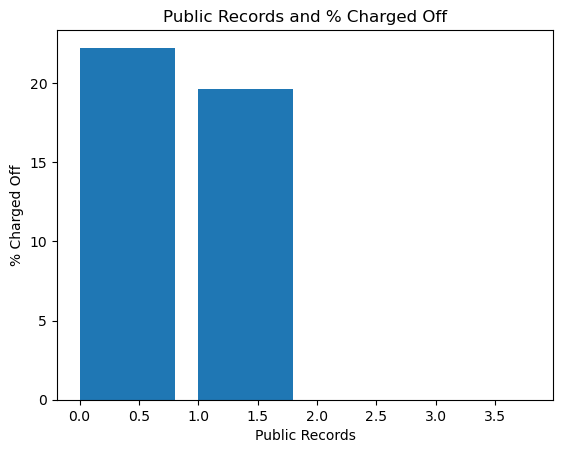

In [439]:
# plot of percentage of charged off loan against Public Records
loan_bins =  np.arange(0, 5, 1)   # Define your loan_bins
analyse_col = 'pub_rec'  # Column name for Public Records
x_label = 'Public Records'  # X-axis label
y_label = '% Charged Off'  # Y-axis label
title = 'Public Records and % Charged Off'  # Plot title

plot_charged_off_loans(charged_off_loans, loans_clean, loan_bins, analyse_col, x_label, y_label, title)

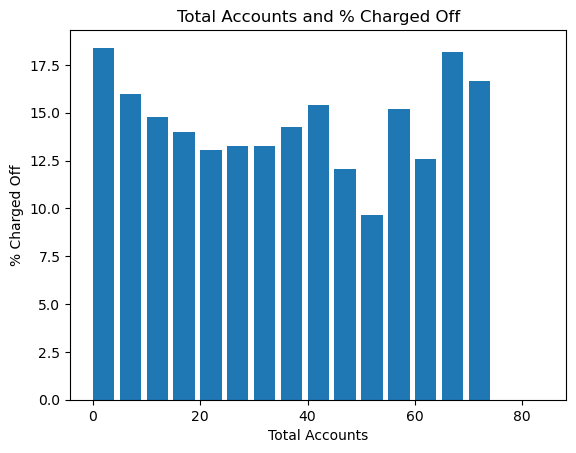

In [440]:
# plot of percentage of charged off loan against Total Accounts
loan_bins =  np.arange(0, 90, 5)   # Define your loan_bins
analyse_col = 'total_acc'  # Column name for Total Accounts
x_label = 'Total Accounts'  # X-axis label
y_label = '% Charged Off'  # Y-axis label
title = 'Total Accounts and % Charged Off'  # Plot title

plot_charged_off_loans(charged_off_loans, loans_clean, loan_bins, analyse_col, x_label, y_label, title)

C:\Users\owner\AppData\Local\Temp\ipykernel_19264\3017571501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['loan_amnt_bin'] = pd.cut(charged_off_loans['loan_amnt'], bins=loan_amnt_bins)
C:\Users\owner\AppData\Local\Temp\ipykernel_19264\3017571501.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['int_rate_bin'] = pd.cut(charged_off_loans['int_rate_float'], bins=int_rate_bins)


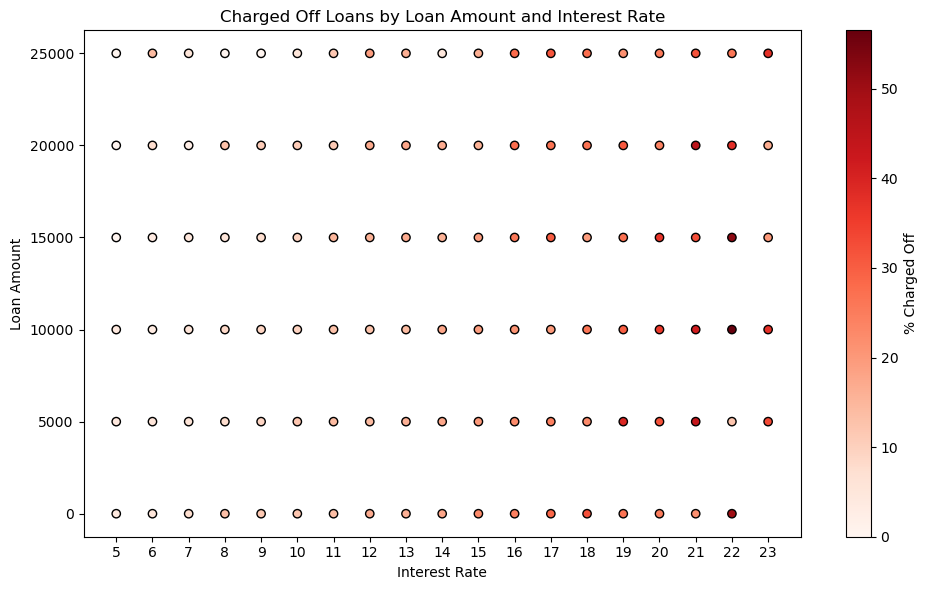

In [414]:
# Bivariate analysis of charged off loans based on loan amount and interest rate
# Define the bin ranges for loan amount and interest rate
loan_amnt_bins = np.arange(0, 35000, 5000)
int_rate_bins = np.arange(5, 25, 1)

# Create the loan amount and interest rate bins 
loans_clean['loan_amnt_bin'] = pd.cut(loans_clean['loan_amnt'], bins=loan_amnt_bins)
loans_clean['int_rate_bin'] = pd.cut(loans_clean['int_rate_float'], bins=int_rate_bins)

charged_off_loans['loan_amnt_bin'] = pd.cut(charged_off_loans['loan_amnt'], bins=loan_amnt_bins)
charged_off_loans['int_rate_bin'] = pd.cut(charged_off_loans['int_rate_float'], bins=int_rate_bins)

# Grouping the loans by loan amount and interest rate bins and calculate the counts
loans_clean_counts = loans_clean.groupby(['loan_amnt_bin', 'int_rate_bin']).size().reset_index(name='Total Loans')
charged_off_counts = charged_off_loans.groupby(['loan_amnt_bin', 'int_rate_bin']).size().reset_index(name='Charged Off Loans')

# Merge the loan counts and charged off counts on the bins
combined_counts = pd.merge(loans_clean_counts, charged_off_counts, on=['loan_amnt_bin', 'int_rate_bin'], how='left')

# Calculate the percentage of Charged Off loans for each bin
combined_counts['Percentage Charged Off'] = (combined_counts['Charged Off Loans'] / combined_counts['Total Loans']) * 100

# Find the bin with the maximum percentage of Charged Off loans
max_percentage = combined_counts['Percentage Charged Off'].max()
max_percentage_bin = combined_counts.loc[combined_counts['Percentage Charged Off'] == max_percentage]

#print('Bin with Maximum % Charged Off:')
#print(max_percentage_bin)

# Convert the interval bins to strings for the scatter plot
combined_counts['loan_amnt_bin'] = combined_counts['loan_amnt_bin'].astype(str)
combined_counts['int_rate_bin'] = combined_counts['int_rate_bin'].astype(str)

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_counts['int_rate_bin'], combined_counts['loan_amnt_bin'], c=combined_counts['Percentage Charged Off'], cmap='Reds', edgecolor='black')
plt.colorbar(label='% Charged Off')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.title('Charged Off Loans by Loan Amount and Interest Rate')
plt.xticks(ticks=range(len(int_rate_bins) - 1), labels=int_rate_bins[:-1])
plt.yticks(ticks=range(len(loan_amnt_bins) - 1), labels=loan_amnt_bins[:-1])
plt.tight_layout()
plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_19264\3393685845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['dti_bin'] = pd.cut(charged_off_loans['dti'], bins=dti_bins)
C:\Users\owner\AppData\Local\Temp\ipykernel_19264\3393685845.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['int_rate_bin'] = pd.cut(charged_off_loans['int_rate_float'], bins=int_rate_bins)


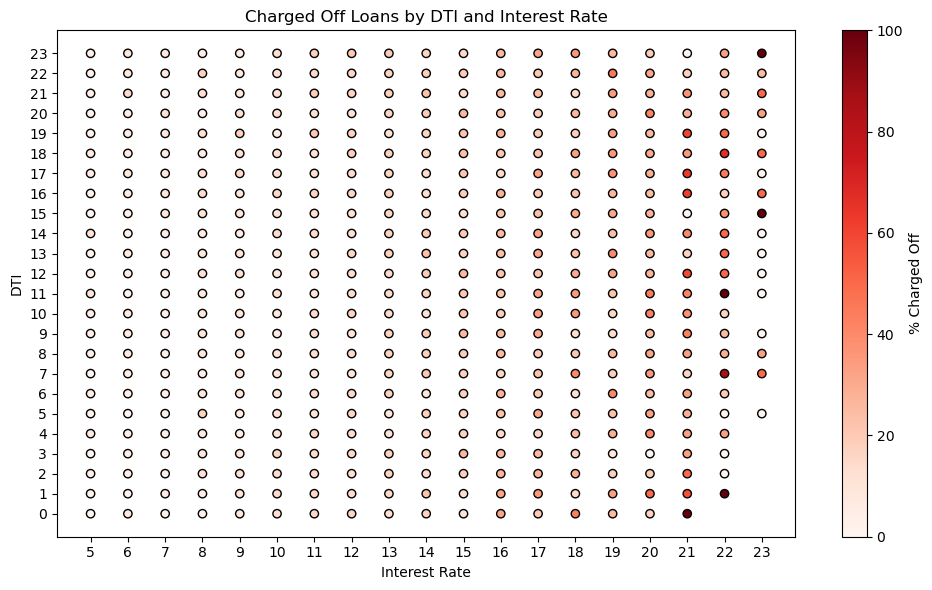

In [415]:
# Bivariate analysis of charged off loans based on dti and interest rate
# Define the bin ranges for dti and interest rate
dti_bins = np.arange(0, 25, 1)
int_rate_bins = np.arange(5, 25, 1)

# Create the loan amount and interest rate bins 
loans_clean['dti_bin'] = pd.cut(loans_clean['dti'], bins=dti_bins)
loans_clean['int_rate_bin'] = pd.cut(loans_clean['int_rate_float'], bins=int_rate_bins)

charged_off_loans['dti_bin'] = pd.cut(charged_off_loans['dti'], bins=dti_bins)
charged_off_loans['int_rate_bin'] = pd.cut(charged_off_loans['int_rate_float'], bins=int_rate_bins)

# Group the loans by dti and interest rate bins and calculate the counts
loans_clean_counts = loans_clean.groupby(['dti_bin', 'int_rate_bin']).size().reset_index(name='Total Loans')
charged_off_counts = charged_off_loans.groupby(['dti_bin', 'int_rate_bin']).size().reset_index(name='Charged Off Loans')

# Merge the loan counts and charged off counts on the bins
combined_counts = pd.merge(loans_clean_counts, charged_off_counts, on=['dti_bin', 'int_rate_bin'], how='left')

# Calculate the percentage of Charged Off loans for each bin
combined_counts['Percentage Charged Off'] = (combined_counts['Charged Off Loans'] / combined_counts['Total Loans']) * 100

# Find the bin with the maximum percentage of Charged Off loans
max_percentage = combined_counts['Percentage Charged Off'].max()
max_percentage_bin = combined_counts.loc[combined_counts['Percentage Charged Off'] == max_percentage]

#print('Bin with Maximum % Charged Off:')
#print(max_percentage_bin)

# Convert the interval bins to strings for the scatter plot
combined_counts['dti_bin'] = combined_counts['dti_bin'].astype(str)
combined_counts['int_rate_bin'] = combined_counts['int_rate_bin'].astype(str)

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_counts['int_rate_bin'], combined_counts['dti_bin'], c=combined_counts['Percentage Charged Off'], cmap='Reds', edgecolor='black')
plt.colorbar(label='% Charged Off')
plt.xlabel('Interest Rate')
plt.ylabel('DTI')
plt.title('Charged Off Loans by DTI and Interest Rate')
plt.xticks(ticks=range(len(int_rate_bins) - 1), labels=int_rate_bins[:-1])
plt.yticks(ticks=range(len(dti_bins) - 1), labels=dti_bins[:-1])
plt.tight_layout()
plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_19264\3443119696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['int_rate_bin'] = pd.cut(charged_off_loans['int_rate_float'], bins=int_rate_bins)


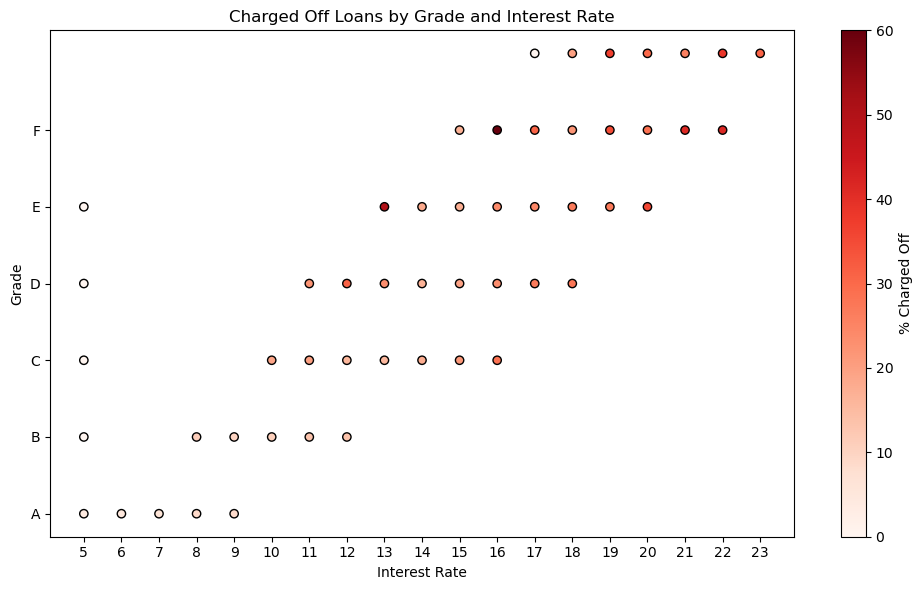

In [416]:
# Bivariate analysis of charged off loans based on grade and interest rate
# Define the bin ranges for grade and interest rate
grade_bins=['A','B','C','D','E','F','G']
int_rate_bins = np.arange(5, 25, 1)

# Create the loan amount and interest rate bins in the DataFrame

loans_clean['int_rate_bin'] = pd.cut(loans_clean['int_rate_float'], bins=int_rate_bins)


charged_off_loans['int_rate_bin'] = pd.cut(charged_off_loans['int_rate_float'], bins=int_rate_bins)

# Group the loans by loan amount and interest rate bins and calculate the counts
loans_clean_counts = loans_clean.groupby(['grade', 'int_rate_bin']).size().reset_index(name='Total Loans')
charged_off_counts = charged_off_loans.groupby(['grade', 'int_rate_bin']).size().reset_index(name='Charged Off Loans')

# Merge the loan counts and charged off counts on the bins
combined_counts = pd.merge(loans_clean_counts, charged_off_counts, on=['grade', 'int_rate_bin'], how='left')

# Calculate the percentage of Charged Off loans for each bin
combined_counts['Percentage Charged Off'] = (combined_counts['Charged Off Loans'] / combined_counts['Total Loans']) * 100

# Find the bin with the maximum percentage of Charged Off loans
max_percentage = combined_counts['Percentage Charged Off'].max()
max_percentage_bin = combined_counts.loc[combined_counts['Percentage Charged Off'] == max_percentage]

#print('Bin with Maximum % Charged Off:')
#print(max_percentage_bin)

# Convert the interval bins to strings for the scatter plot

combined_counts['int_rate_bin'] = combined_counts['int_rate_bin'].astype(str)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_counts['int_rate_bin'], combined_counts['grade'], c=combined_counts['Percentage Charged Off'], cmap='Reds', edgecolor='black')
plt.colorbar(label='% Charged Off')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Charged Off Loans by Grade and Interest Rate')
plt.xticks(ticks=range(len(int_rate_bins) - 1), labels=int_rate_bins[:-1])
plt.yticks(ticks=range(len(grade_bins) - 1), labels=grade_bins[:-1])
plt.tight_layout()
plt.show()